WARNING    "current" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([300, 310, 320, ..., 470, 480, 490]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Missing compiler_cxx fix for MSVCCompiler


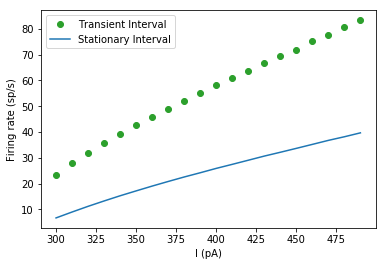

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory, plot_tools
from brian2 import *

# Descrição dos parâmetros do modelo
C = 100*pF; gL = 10*nS; EL = -75*mV; VT = -50*mV; DeltaT = 2*mV; tauw = 200*ms; a = 2*nS; b = 0.02*nA; Vmax = 20*mV; 
vreset = -80*mV; duration = 5000*ms; w_0 = 0*nA;

# Correntes de entrada
current = np.arange(300,500,10)


# Modelo de Neurônio
start_scope()
eqs = '''dw/dt=(a*(vm-EL)-w)/tauw : amp
         dvm/dt = ((gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + current)/C) : volt
         current : amp'''
G = NeuronGroup(len(current), eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; w = w + b', method='euler', dt= 0.1*b2.ms)
G.vm = EL
G.w = w_0
G.current = current*b2.pA
statemon = b2.StateMonitor(G, ["vm","w"], record=True)
spikemon = b2.SpikeMonitor(G)

# Rodando a simulação
b2.run(duration)

input_current = [None]*len(current)
first_inter = [None]*len(current)
stationary_inter = [None]*len(current)
for i in range(len(current)):
    first_inter[i] = 1/(float(spikemon.spike_trains()[i][2]) - float(spikemon.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spikemon.spike_trains()[i][-2]) - float(spikemon.spike_trains()[i][-3]))
    
# Plot
plt.plot(G.current/b2.pA, first_inter/b2.second, 'o' , c='C2', lw=3, label='Transient Interval')
plt.plot(G.current/b2.pA, stationary_inter/b2.second, label='Stationary Interval')
plt.xlabel('I (pA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()

